<a href="https://colab.research.google.com/github/cindylrs04/PCVK25_3F_06/blob/main/Week9_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cindy Laili Larasati - 06

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [3]:
!pip install pytesseract

In [4]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

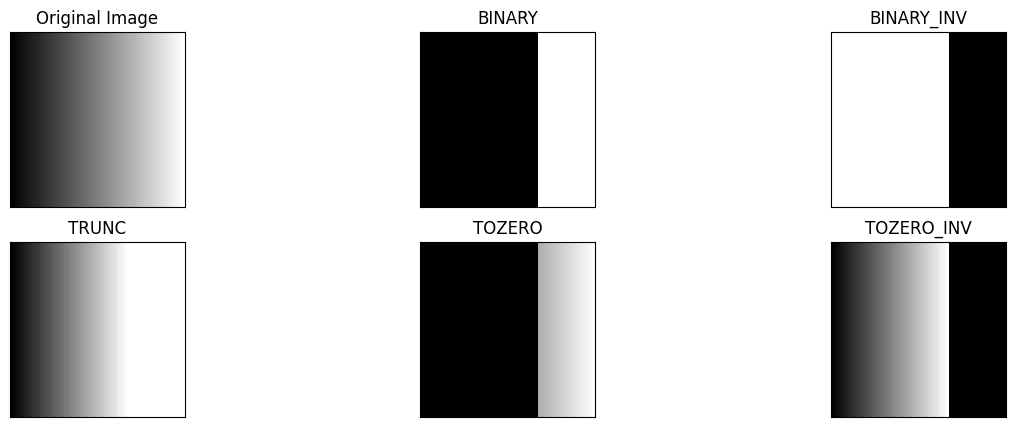

In [23]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/gradient.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)

thresh1 = img.copy()
thresh2 = img.copy()
thresh3 = img.copy()
thresh4 = img.copy()
thresh5 = img.copy()

# Nilai threshold yang ditentukan
thresh = 170

# 1. Binary Threshold
# jika pixel > threshold maka 255, selain itu 0
thresh1[img > thresh] = 255
thresh1[img <= thresh] = 0

# 2. Binary Inverse Threshold
# kebalikan dari binary
thresh2[img > thresh] = 0
thresh2[img <= thresh] = 255

# 3. Truncate Threshold
# jika pixel > threshold maka = threshold, selain itu tetap
thresh3[img > thresh] = thresh

# 4. Tozero Threshold
# jika pixel <= threshold maka = 0, selain itu tetap
thresh4[img <= thresh] = 0

# 5. Tozero Inverse Threshold
# jika pixel > threshold maka = 0, selain itu tetap
thresh5[img > thresh] = 0

# Tampilkan hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

Nilai threshold Otsu: 167


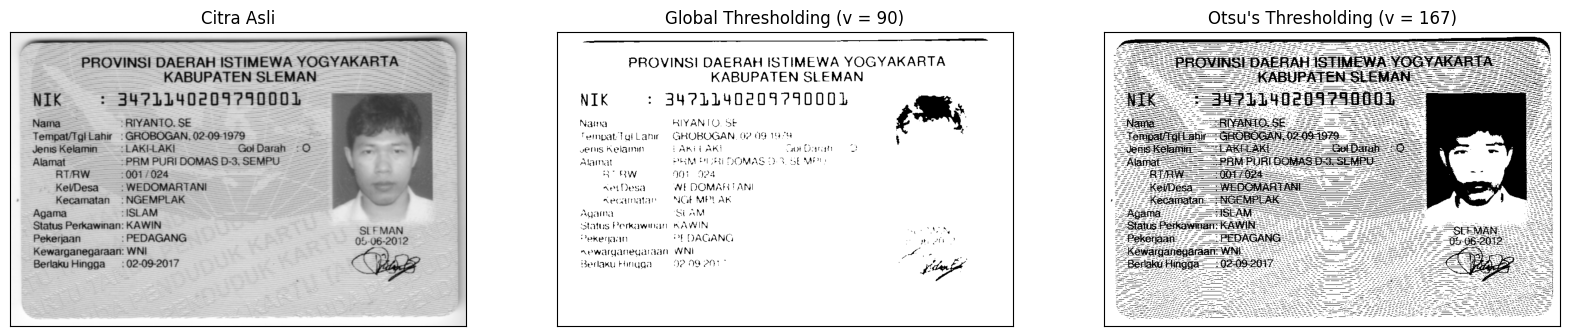

In [7]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png'
img = cv.imread(filename, 0)
blur = cv.GaussianBlur(img, (5,5), 0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)

    for t in range(1, 256):
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])

        if pcb == 0 or pcf == 0:
            continue

        Wb = pcb * mean_weight
        Wf = pcf * mean_weight
        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)

        value = Wb * Wf * (mub - muf) ** 2
        if value > final_value:
            final_thresh = t
            final_value = value

    final_img = gray.copy()
    print("Nilai threshold Otsu:", final_thresh)

    final_img[gray > final_thresh] = 255
    final_img[gray <= final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = "Otsu's Thresholding (v = " + str(otsu_thresh) + ")"

ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1)
    plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.

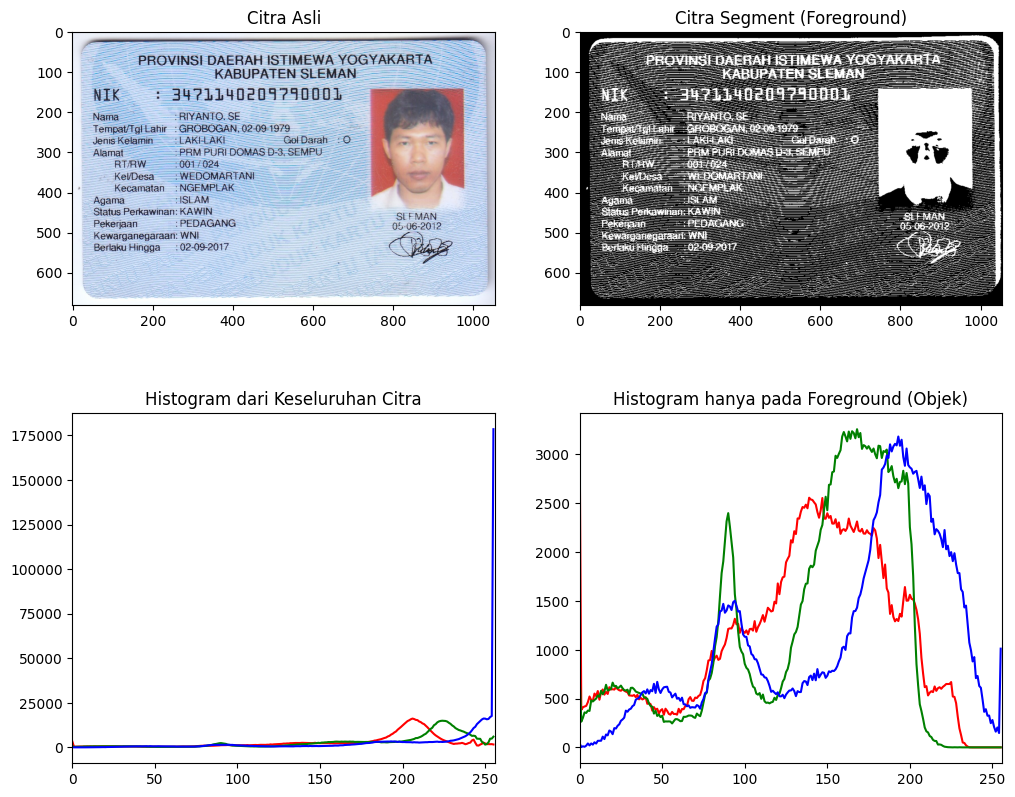

In [8]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png'

img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

ret3, mask = cv.threshold(img_gray, 200, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('Citra Asli')

plt.subplot(2,2,2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment (Foreground)')

color = ('r', 'g', 'b')

plt.subplot(2,2,3)
for i, col in enumerate(color):
    hist0 = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist0, color=col)
plt.title('Histogram dari Keseluruhan Citra')
plt.xlim([0, 256])

plt.subplot(2,2,4)
for i, col in enumerate(color):
    hist1 = cv.calcHist([img], [i], mask, [256], [0, 256])
    plt.plot(hist1, color=col)
plt.title('Histogram hanya pada Foreground (Objek)')
plt.xlim([0, 256])

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

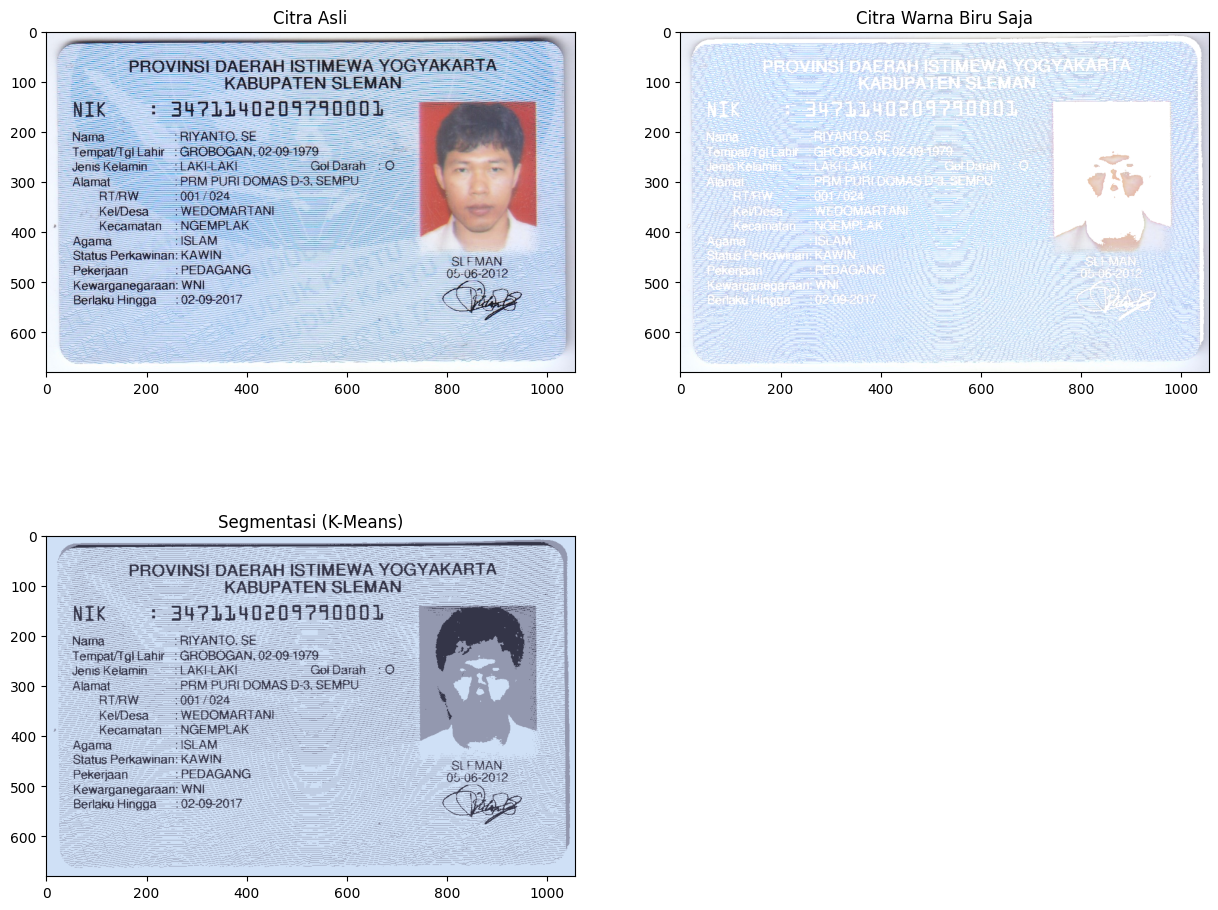

In [11]:
filename = '/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()

segmented_image = centers[labels]
segmented_image = segmented_image.reshape(img.shape)

blue_index = np.argmax(centers[:, 2])

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != blue_index] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img), plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(masked_image0), plt.title('Citra Warna Biru Saja')
plt.subplot(2, 2, 3), plt.imshow(segmented_image), plt.title('Segmentasi (K-Means)')
plt.show()

7. Proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [12]:
!pip install pytesseract

In [13]:
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ind
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 537 kB of archives.
After this operation, 1,138 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 537 kB in 1s (725 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-ind.
(Reading databa

2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian
kita tunjukan objek figure kita dengan method show()

In [15]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    plt.show()

3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [17]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


4. Menambahkan kotak untuk deteksi teksi pada gambar

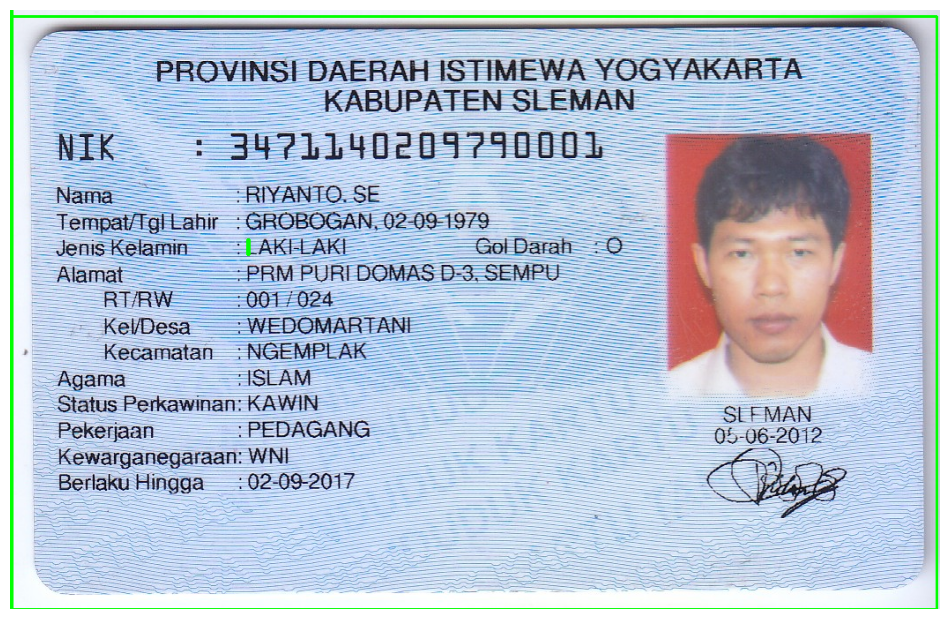

In [22]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

display(img)

5. Hasil pembacaan KTP Menjadi text

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



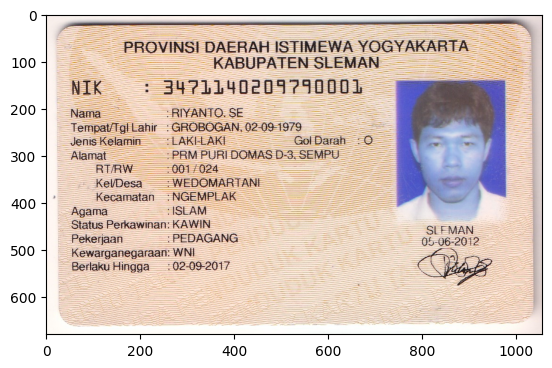

In [24]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_06/Gambar/ktp.png")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()